 ## Question 1: "Which genes are associated with resistance to Lapatinib?"

In [47]:
import pandas as pd

In [49]:
merged = pd.read_csv("merged.csv")

C:\Users\dimim\AppData\Local\Temp\ipykernel_29440\1204448642.py:1: DtypeWarning: Columns (19182) have mixed types. Specify dtype option on import or set low_memory=False.
  merged = pd.read_csv("merged.csv")


In [51]:
merged.drop(columns=merged.columns[0], axis=1,  inplace=True)
merged.head()

,DepMap_ID,TSPAN6 (7105),TNMD (64102),DPM1 (8813),SCYL3 (57147),C1orf112 (55732),FGR (2268),CFH (3075),FUCA2 (2519),GCLC (2729),...,PUTATIVE_TARGET,PATHWAY_NAME,COMPANY_ID,WEBRELEASE,MIN_CONC,MAX_CONC,LN_IC50,AUC,RMSE,Z_SCORE
0,ACH-000242,7.465648,0.0,6.435462,2.414136,3.864929,0.831877,7.198003,5.452530,7.112492,...,"EGFR, ERBB2",EGFR signaling,1046,Y,0.010005,10.0,3.689474,0.953666,0.059481,0.495093
1,ACH-000233,0.097611,0.0,5.919102,3.983678,3.733354,0.028569,6.111240,2.963474,3.415488,...,"EGFR, ERBB2",EGFR signaling,1046,Y,0.010005,10.0,1.756594,0.877146,0.140340,-0.636897
2,ACH-001655,4.376429,0.0,6.679480,0.925999,1.867896,0.042644,0.056584,5.394034,1.839960,...,"EGFR, ERBB2",EGFR signaling,1046,Y,0.010005,10.0,4.181628,0.950080,0.048823,0.783323
3,ACH-000792,3.798051,0.0,6.197708,1.739848,3.459432,0.084064,0.411426,6.562853,4.407353,...,"EGFR, ERBB2",EGFR signaling,1046,Y,0.010005,10.0,1.391909,0.798025,0.173098,-0.850474
4,ACH-000351,4.614121,0.0,8.070443,2.356144,4.105175,1.641546,0.344828,6.004501,4.624686,...,"EGFR, ERBB2",EGFR signaling,1046,Y,0.010005,10.0,2.315312,0.838491,0.063236,-0.309684


In [53]:
drug_sensitivity = pd.read_excel('GDSC2_fitted_dose_response_25Feb20.xlsx', engine='openpyxl')

In [55]:
drug_sensitivity.to_csv("drug_sensitivity.csv")
drug_sensitivity.head()

,DATASET,NLME_RESULT_ID,NLME_CURVE_ID,COSMIC_ID,CELL_LINE_NAME,SANGER_MODEL_ID,TCGA_DESC,DRUG_ID,DRUG_NAME,PUTATIVE_TARGET,PATHWAY_NAME,COMPANY_ID,WEBRELEASE,MIN_CONC,MAX_CONC,LN_IC50,AUC,RMSE,Z_SCORE
0,GDSC2,282,13320532,749709,HCC1954,SIDM00872,BRCA,1003,Camptothecin,TOP1,DNA replication,1046,Y,0.000098,0.1,-0.251083,0.975203,0.112373,0.906631
1,GDSC2,282,13320565,749710,HCC1143,SIDM00866,BRCA,1003,Camptothecin,TOP1,DNA replication,1046,Y,0.000098,0.1,1.343315,0.978464,0.067577,1.683567
2,GDSC2,282,13320598,749711,HCC1187,SIDM00885,BRCA,1003,Camptothecin,TOP1,DNA replication,1046,Y,0.000098,0.1,1.736985,0.995100,0.045205,1.875399
3,GDSC2,282,13320631,749712,HCC1395,SIDM00884,BRCA,1003,Camptothecin,TOP1,DNA replication,1046,Y,0.000098,0.1,-2.309078,0.867832,0.107282,-0.096212
4,GDSC2,282,13320668,749713,HCC1599,SIDM00877,BRCA,1003,Camptothecin,TOP1,DNA replication,1046,Y,0.000098,0.1,-3.106684,0.777532,0.098286,-0.484878


In [57]:
lapatinib_data = drug_sensitivity[drug_sensitivity['DRUG_NAME'] == 'Lapatinib']

In [59]:
metadata = pd.read_csv("sample_info.csv")

In [61]:
metadata.columns = metadata.columns.str.upper()

In [63]:
merged_df = pd.merge(metadata, lapatinib_data, on='SANGER_MODEL_ID')

In [64]:
merged_df.columns

Index(['DEPMAP_ID', 'CELL_LINE_NAME_x', 'STRIPPED_CELL_LINE_NAME', 'CCLE_NAME',
       'ALIAS', 'COSMICID', 'SEX', 'SOURCE', 'RRID', 'WTSI_MASTER_CELL_ID',
       'SAMPLE_COLLECTION_SITE', 'PRIMARY_OR_METASTASIS', 'PRIMARY_DISEASE',
       'SUBTYPE', 'AGE', 'SANGER_MODEL_ID', 'DEPMAP_PUBLIC_COMMENTS',
       'LINEAGE', 'LINEAGE_SUBTYPE', 'LINEAGE_SUB_SUBTYPE',
       'LINEAGE_MOLECULAR_SUBTYPE', 'CULTURE_TYPE', 'DATASET',
       'NLME_RESULT_ID', 'NLME_CURVE_ID', 'COSMIC_ID', 'CELL_LINE_NAME_y',
       'TCGA_DESC', 'DRUG_ID', 'DRUG_NAME', 'PUTATIVE_TARGET', 'PATHWAY_NAME',
       'COMPANY_ID', 'WEBRELEASE', 'MIN_CONC', 'MAX_CONC', 'LN_IC50', 'AUC',
       'RMSE', 'Z_SCORE'],
      dtype='object')

In [65]:
expression_data = pd.read_csv("CCLE_expression.csv")
expression_data.columns.values[0] = ('DEPMAP_ID')

In [66]:
# Defining thresholds
q25 = merged_df['LN_IC50'].quantile(0.25)
q75 = merged_df['LN_IC50'].quantile(0.75)

# Classifying response based on IC50
def classify_ic50(x):
    if x <= q25:
        return 'Sensitive'
    elif x >= q75:
        return 'Resistant'
    else:
        return 'Intermediate'

merged_df['RESPONSE'] = merged_df['LN_IC50'].apply(classify_ic50)

In [67]:
merged_df.head

<bound method NDFrame.head of       DEPMAP_ID CELL_LINE_NAME_x STRIPPED_CELL_LINE_NAME  \
0    ACH-000001      NIH:OVCAR-3               NIHOVCAR3   
1    ACH-000002            HL-60                    HL60   
2    ACH-000006       MONO-MAC-6                MONOMAC6   
3    ACH-000008            A101D                   A101D   
4    ACH-000009           C2BBe1                  C2BBE1   
..          ...              ...                     ...   
751  ACH-002314              TUR                     TUR   
752  ACH-002316          WIL2-NS                  WIL2NS   
753  ACH-002317               YT                      YT   
754  ACH-002339              MOT                     MOT   
755  ACH-002345            CaR-1                    CAR1   

                                       CCLE_NAME   ALIAS   COSMICID      SEX  \
0                                NIHOVCAR3_OVARY  OVCAR3   905933.0   Female   
1        HL60_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE     NaN   905938.0   Female   
2    MONO

In [68]:
merged_expression = pd.merge(merged_df, expression_data, on='DEPMAP_ID')

In [103]:
# Filtering only the two extreme groups
binary_df = merged_expression[merged_expression['RESPONSE'].isin(['Sensitive', 'Resistant'])]
binary_df

,DEPMAP_ID,CELL_LINE_NAME_x,STRIPPED_CELL_LINE_NAME,CCLE_NAME,ALIAS,COSMICID,SEX,SOURCE,RRID,WTSI_MASTER_CELL_ID,...,ARHGAP11B (89839),AC004593.2 (1124),AC090517.4 (54816),AL160269.1 (11046),ABCF2-H2BE1 (114483834),POLR2J3 (548644),H2BE1 (114483833),AL445238.1 (647264),GET1-SH3BGR (106865373),AC113348.1 (102724657)
0,ACH-000001,NIH:OVCAR-3,NIHOVCAR3,NIHOVCAR3_OVARY,OVCAR3,905933.0,Female,ATCC,CVCL_0465,2201.0,...,1.545968,0.189034,0.275007,0.000000,0.545968,4.424922,0.0,0.000000,0.124328,0.000000
1,ACH-000002,HL-60,HL60,HL60_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NaN,905938.0,Female,ATCC,CVCL_0002,55.0,...,1.761285,0.000000,0.056584,0.000000,0.799087,3.748461,0.0,0.000000,0.189034,0.000000
5,ACH-000012,HCC827,HCC827,HCC827_LUNG,NaN,1240146.0,Female,ATCC,CVCL_2063,354.0,...,1.695994,0.545968,0.111031,0.137504,3.132577,5.238023,0.0,0.000000,0.536053,0.000000
10,ACH-000023,PA-TU-8988T,PATU8988T,PATU8988T_PANCREAS,NaN,1240201.0,Female,DSMZ,CVCL_1847,1242.0,...,2.283922,0.214125,0.042644,0.000000,2.657640,5.876271,0.0,0.000000,0.526069,0.000000
12,ACH-000030,PC-14,PC14,PC14_LUNG,NaN,753608.0,Male,RIKEN,CVCL_1640,198.0,...,1.056584,0.097611,0.070389,0.028569,2.797013,5.650190,0.0,0.124328,0.650765,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,ACH-001820,COLO-824,COLO824,COLO824_BREAST,NaN,NaN,Female,DSMZ,CVCL_1136,NaN,...,1.765535,0.028569,0.238787,0.000000,2.094236,5.593653,0.0,0.000000,0.275007,0.000000
569,ACH-002029,SAS,SAS,SAS_UPPER_AERODIGESTIVE_TRACT,NaN,NaN,Female,RIKEN,CVCL_1675,NaN,...,1.339137,0.124328,0.056584,0.000000,2.130931,4.631104,0.0,0.000000,0.000000,0.042644
570,ACH-002045,HO-1-u-1,HO1U1,HO1U1_UPPER_AERODIGESTIVE_TRACT,NaN,NaN,Male,RIKEN,CVCL_2784,NaN,...,1.304511,0.042644,0.028569,1.704872,0.933573,5.305241,0.0,0.000000,0.150560,0.000000
572,ACH-002062,SLVL,SLVL,SLVL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NaN,NaN,Female,RIKEN,CVCL_3169,NaN,...,0.641546,0.000000,0.014355,0.000000,2.185867,4.956057,0.0,0.042644,0.650765,0.000000


In [130]:
import numpy as np
from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import multipletests

# Initialize lists for storing results
genes = []
log2_fc = []
p_values = []


for gene in gene_cols:
    try:
        # Getting the expression values for the sensitive and resistant cell lines
        sens_values = sensitive_expr[gene].dropna()
        res_values = resistant_expr[gene].dropna()
        
        # Checking if there are enough data points in both groups
        if len(sens_values) < 3 or len(res_values) < 3:
            continue  # Skip genes with insufficient data points

        # Mann-Whitney U test
        stat, p = mannwhitneyu(sens_values, res_values, alternative='two-sided')

        # Calculating the fold change and log2 fold change
        fc = sens_values.mean() / (res_values.mean() + 1e-9)  # Avoid division by zero
        log2fc = np.log2(fc + 1e-9)  # Add small constant to avoid log(0)

        genes.append(gene)
        p_values.append(p)
        log2_fc.append(log2fc)
        
    except Exception as e:
        continue  # Skip any gene that causes an error????

# Adjusting p-values for multiple testing using Benjamini-Hochberg FDR (I found this is commonly used)
_, adj_p, _, _ = multipletests(p_values, method='fdr_bh')

results_df = pd.DataFrame({
    'Gene': genes,
    'Log2FC': log2_fc,
    'p_value': p_values,
    'adj_p_value': adj_p
})

results_df.head()


,Gene,Log2FC,p_value,adj_p_value
0,TSPAN6 (7105),-0.373198,0.000867,0.006223
1,TNMD (64102),-0.234558,0.729048,0.842230
2,DPM1 (8813),-0.039969,0.015787,0.058176
3,SCYL3 (57147),0.124150,0.010679,0.043141
4,C1orf112 (55732),0.095277,0.001477,0.009353


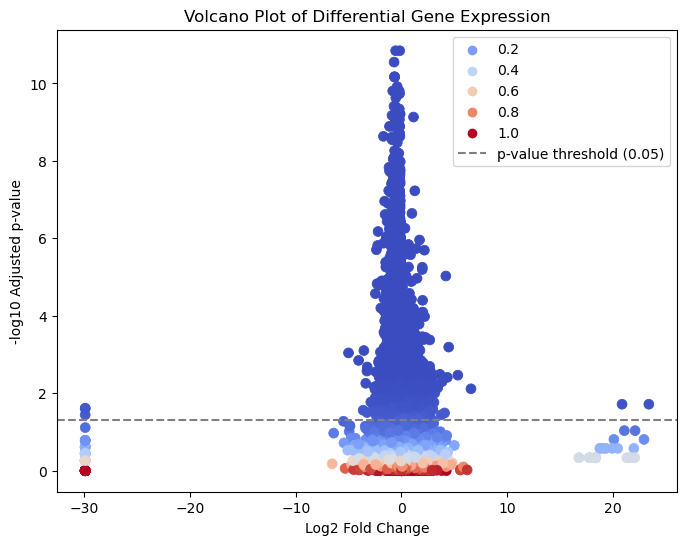

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the volcano plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=results_df, x='Log2FC', y=-np.log10(results_df['adj_p_value']), hue='adj_p_value', palette='coolwarm', edgecolor=None, s=50)
plt.axhline(y=-np.log10(0.05), color='gray', linestyle='--', label='p-value threshold (0.05)')
plt.title('Volcano Plot of Differential Gene Expression')
plt.xlabel('Log2 Fold Change')
plt.ylabel('-log10 Adjusted p-value')
plt.legend()
plt.show()


In [132]:

significant_genes = results_df[(results_df['adj_p_value'] < 0.05) & (abs(results_df['Log2FC']) > 1)]


significant_genes.to_csv("significant_genes_lapatinib.csv", index=False)


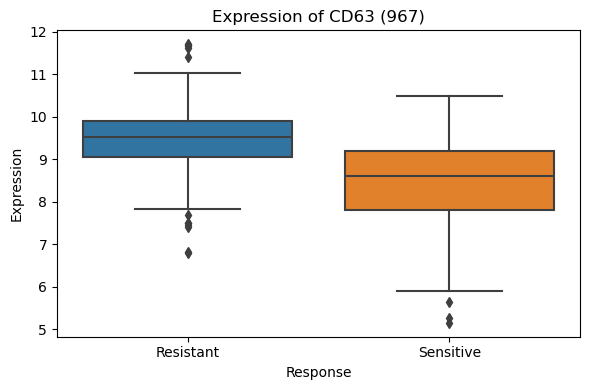

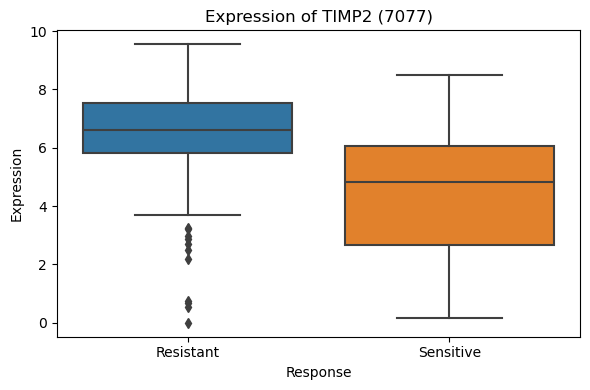

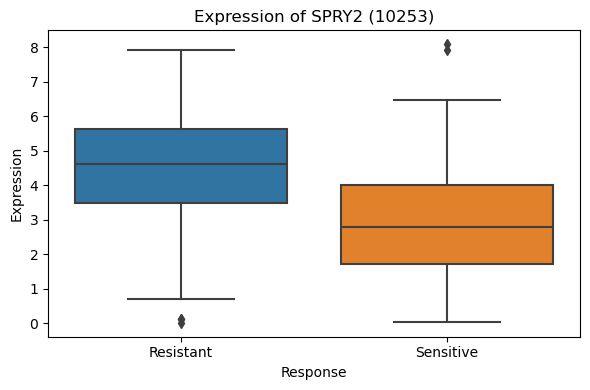

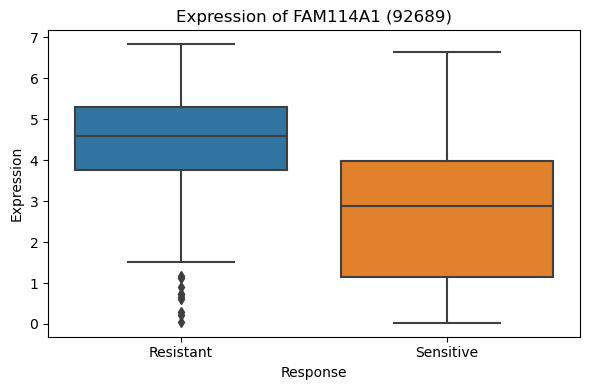

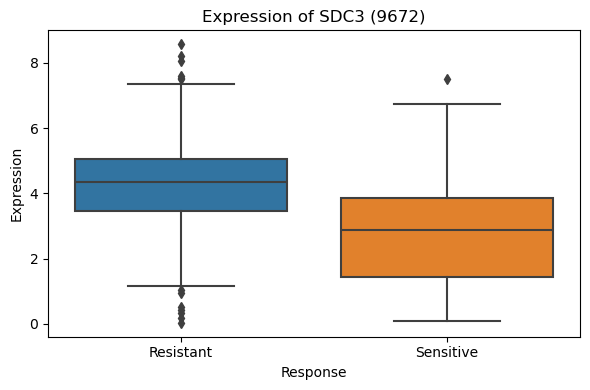

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt

# Top 5 significant genes by adjusted p-value
top_genes = results_df.sort_values('adj_p_value').head(5)['Gene'].tolist()


for gene in top_genes:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=binary_df['RESPONSE'], y=binary_df[gene])
    plt.title(f'Expression of {gene}')
    plt.ylabel('Expression')
    plt.xlabel('Response')
    plt.tight_layout()
    plt.show()


In [124]:
#  Question 2: Which genes are upregulated in sensitive vs resistant cell lines (or vice versa)?

In [134]:
# Thresholds
log2fc_threshold = 0.5
pval_threshold = 0.05

# Getting upregulated genes in each group
up_in_sensitive = results_df[
    (results_df['Log2FC'] > log2fc_threshold) &
    (results_df['adj_p_value'] < pval_threshold)
]

up_in_resistant = results_df[
    (results_df['Log2FC'] < -log2fc_threshold) &
    (results_df['adj_p_value'] < pval_threshold)
]

print("Upregulated in Sensitive:", up_in_sensitive.shape[0])
print("Upregulated in Resistant:", up_in_resistant.shape[0])


Upregulated in Sensitive: 374
Upregulated in Resistant: 1126


In [135]:
up_in_sensitive.to_csv("upregulated_in_sensitive.csv", index=False)
up_in_resistant.to_csv("upregulated_in_resistant.csv", index=False)


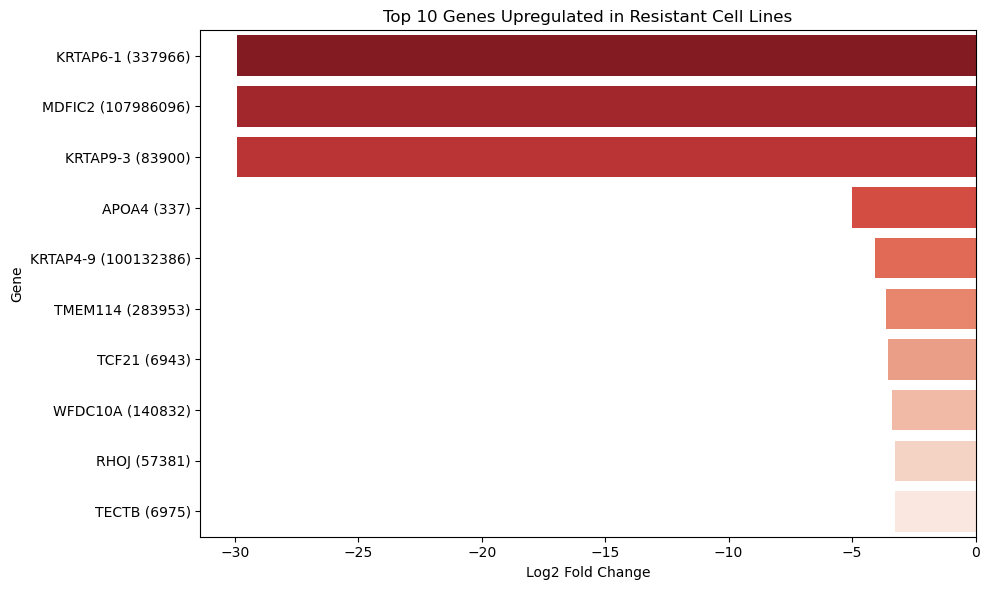

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt

top_resistant = up_in_resistant.sort_values('Log2FC').head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Log2FC', y='Gene', data=top_resistant, palette='Reds_r')
plt.title("Top 10 Genes Upregulated in Resistant Cell Lines")
plt.xlabel("Log2 Fold Change")
plt.tight_layout()
plt.show()


In [137]:
top_sensitive = up_in_sensitive.sort_values('Log2FC', ascending=False).head(10)


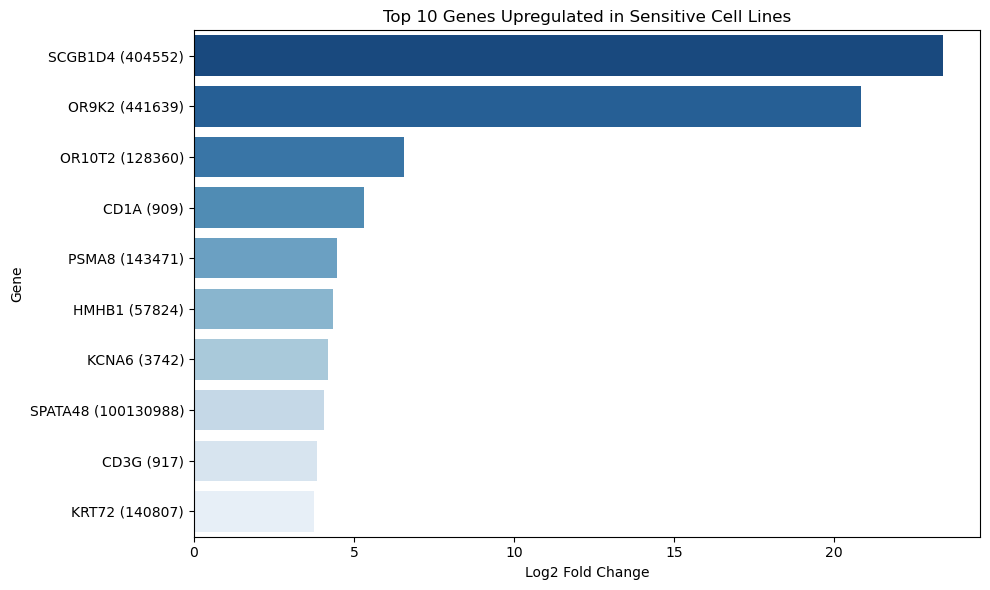

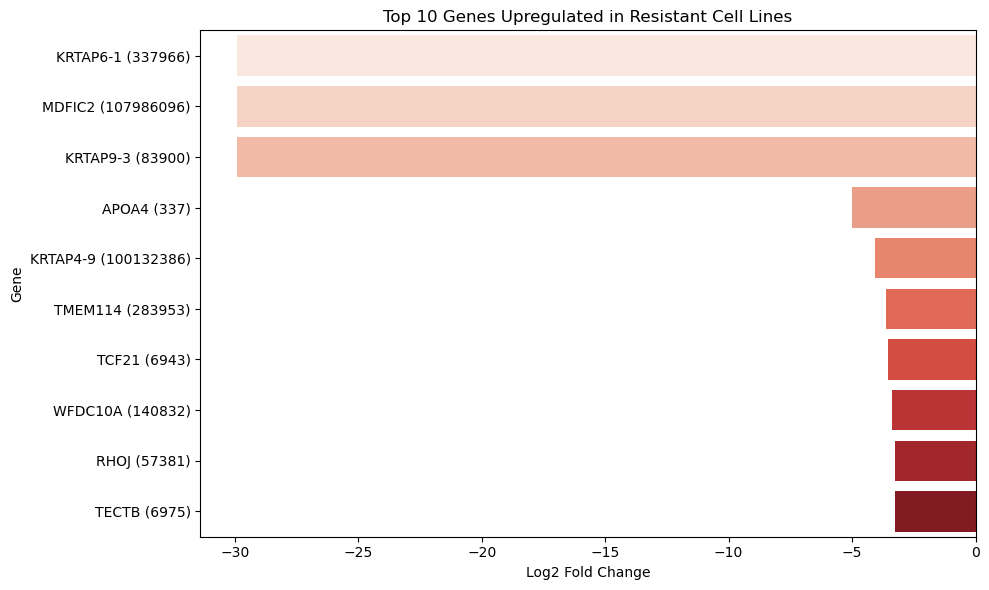

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt

# Top 10 genes for each group
top_sensitive = up_in_sensitive.sort_values('Log2FC', ascending=False).head(10)
top_resistant = up_in_resistant.sort_values('Log2FC').head(10)

# Plot - Sensitive
plt.figure(figsize=(10, 6))
sns.barplot(x='Log2FC', y='Gene', data=top_sensitive, palette='Blues_r')
plt.title("Top 10 Genes Upregulated in Sensitive Cell Lines")
plt.xlabel("Log2 Fold Change")
plt.ylabel("Gene")
plt.tight_layout()
plt.show()

# Plot - Resistant
plt.figure(figsize=(10, 6))
sns.barplot(x='Log2FC', y='Gene', data=top_resistant, palette='Reds')
plt.title("Top 10 Genes Upregulated in Resistant Cell Lines")
plt.xlabel("Log2 Fold Change")
plt.ylabel("Gene")
plt.tight_layout()
plt.show()


In [139]:
# Question3: Which genes change expression before and after Lapatinib treatment?